In [1]:
import spotiphy
import numpy as np
import pandas as pd
import matplotlib as mpl
import scanpy as sc
import squidpy as sq
import seaborn as sns
import anndata as ad
from matplotlib.colors import ListedColormap

### Cluster location

In [44]:
sample = '8'
results_folder = 'Results/Breast cancer/decomposition/'
adata_st = sc.read_h5ad("F:/Ziqian Zheng/Spotiphy_data/BreastCancerData/visium_spatial_sample_v0"+sample+".h5ad")
X = adata_st.obsm['X_spatial']
X[:, 1] = -X[:, 1]
adata_st.obsm['X_spatial'] = X
adata_st_own = sc.read_h5ad("F:/Ziqian Zheng/Spotiphy_data/Simulated ST/ST_Simulated_221_1.h5ad")
adata_st.uns['spatial'] = adata_st_own.uns['spatial']

meta = pd.read_excel(results_folder+"MergeBC.BCell_meta_group.xlsx", header=0)
meta = meta[meta['samplename']=='BC'+sample]
meta = meta[meta['cell_type']=='bcells']
meta['seurat_clusters'] = [str(i) for i in meta['seurat_clusters']]
meta = meta[meta['seurat_clusters'].isin(['0', '1', '2', '3'])]
colors = ["#F8766d", "#00BFC4", "#C77CFF", "#7CAE00"]
cmap = ListedColormap(colors)

In [45]:
cell_location = meta[['location_x', 'location_y']].values
spot_location = adata_st.obsm['X_spatial']
d = np.sum(np.abs(spot_location[:, :, np.newaxis] - cell_location.T), axis=1)
adata_st.obs['b_cluster'] = '-1'
adata_st.obs[['x', 'y']] = spot_location
for i in range(len(adata_st)):
    if min(d[i]) < 1:
        idx = np.where(d[i]<1)[0][0]
        adata_st.obs.iloc[i, -3] = str(meta.iloc[idx, -5])

In [34]:
adata_st.obs

,mapped_reference_assembly,mapped_reference_annotation,alignment_software,donor_id,self_reported_ethnicity_ontology_term_id,donor_living_at_sample_collection,donor_menopausal_status,organism_ontology_term_id,sample_uuid,sample_preservation_method,...,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,b_cluster,x,y
AAACAAGTATCTCCCA-1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,732.959838,-484.593829
AAACAATCTACTAGCA-1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1790.849642,-1238.095217
AAACAGAGCGACTCCT-1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1540.616220,-582.633043
AAACCGGGTAGGTACC-1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,917.833784,-1436.507912
AAACCGTTCGTCCAGG-1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,692.810446,-1257.236206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCTAGATACGCT-1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1390.289425,-1755.835637
TTGTTTCACATCCAGG-1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,558.356666,-1258.169913
TTGTTTCATTAGTCTA-1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,514.472447,-1413.165242
TTGTTTCCATACAACT-1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,850.606895,-1449.579807


anndata.py (1222): Trying to modify attribute `.obs` of view, initializing view as actual.


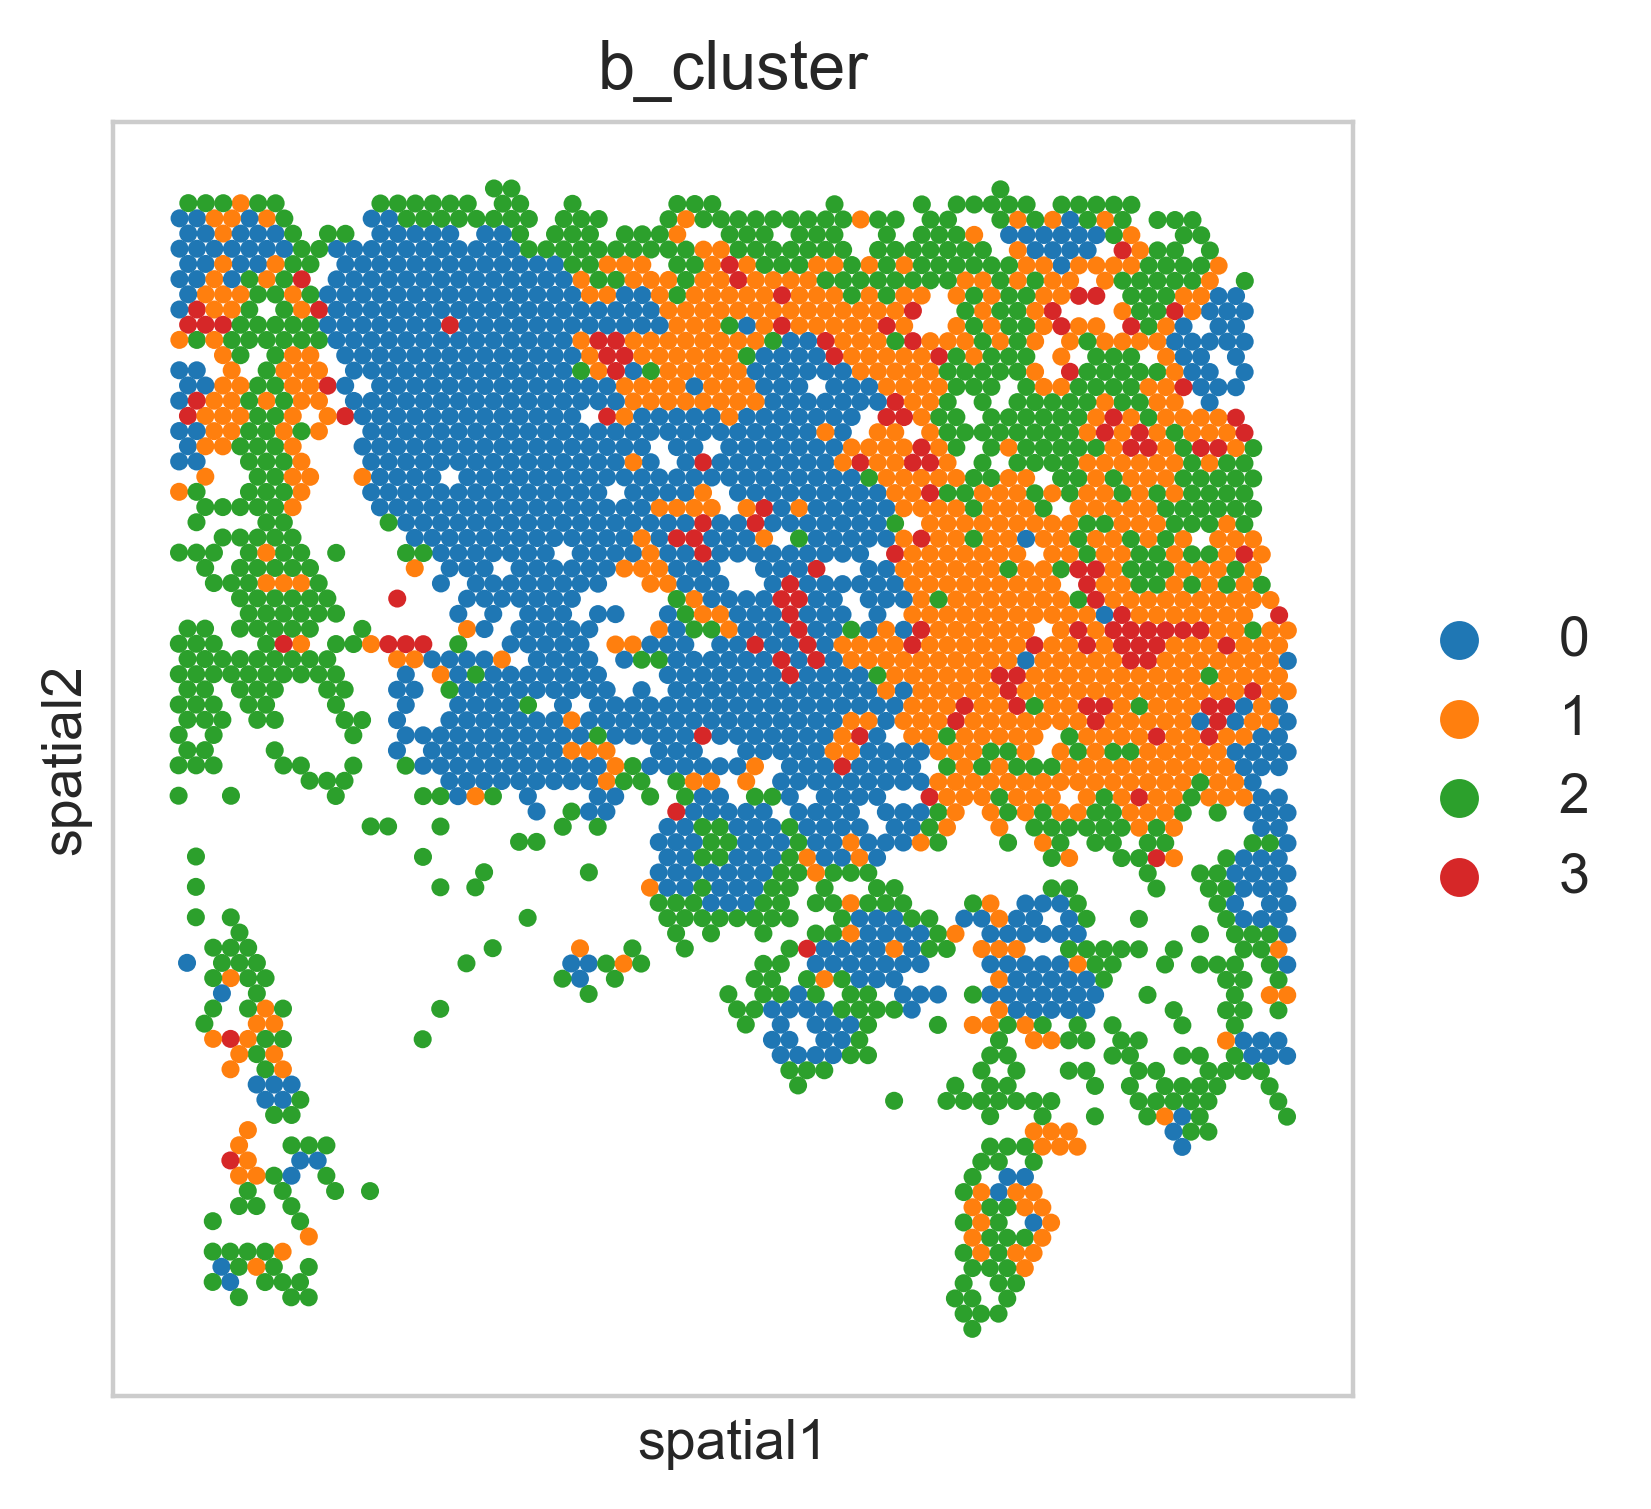

In [46]:
adata_st_temp = adata_st[adata_st.obs['b_cluster']!='-1']
with mpl.rc_context({'figure.figsize': [4, 4.5], 'figure.dpi': 400}):
    ax = sc.pl.spatial(adata_st_temp, color=['b_cluster'], img_key=None, size=0.35, show=False)
    ax[0].get_figure().savefig(results_folder+'BCell_cluster_'+sample+'.jpg', bbox_inches='tight')
    mpl.pyplot.show()

### Annotation similarity

In [35]:
sample_name = '221'
results_folder = 'Results/AD Sample '+sample_name+'/decomposition/annotation/'
c2l = pd.read_excel(results_folder+'cell2location.astro_markers.xlsx')
c2l = c2l[c2l['p_val']<0.1]
sp = pd.read_excel(results_folder+'MergeST.astro.ClusterRes_12_markers.xlsx')
sp = sp[sp['p_val']<0.1]
n_marker_c2l = min(c2l['cluster'].value_counts())
n_marker_sp = min(sp['cluster'].value_counts())
cluster_c2l = sorted(list(c2l['cluster'].unique()))
cluster_sp = sorted(list(sp['cluster'].unique()))

In [22]:
similarity = np.zeros((len(cluster_c2l), len(cluster_sp)))
for i, c1 in enumerate(cluster_c2l):
    for j, c2 in enumerate(cluster_sp):
        g1 = list(c2l[c2l['cluster']==c1]['gene'])[:n_marker_c2l]
        g2 = list(sp[sp['cluster']==c2]['gene'])[:n_marker_sp]
        common = set(g1) & set(g2)
        similarity[i, j] = len(common)

In [27]:
c2l['cluster'].value_counts()

cluster
Astro_THAL_lat    336
Astro_CTX         293
Astro_THAL_med    275
Astro_HYPO        258
Astro_AMY_CTX     256
Astro_AMY         214
Astro_WM          199
Astro_HPC         192
Astro_STR         148
Astro_THAL_hab    103
Name: count, dtype: int64

In [24]:
similarity

array([[11.,  2.,  0.,  9., 38., 10., 11.,  5., 30., 11., 12.,  6.],
       [17.,  0.,  1.,  4., 41., 10., 12., 11., 28.,  9.,  9.,  8.],
       [16.,  0.,  3.,  5., 35., 10., 14., 12., 26., 11., 19.,  9.],
       [14.,  1.,  1.,  6., 39., 11.,  8.,  7., 23., 16., 14.,  6.],
       [ 8.,  8.,  6., 19.,  7., 22.,  7., 21., 12.,  7., 11., 21.],
       [16.,  0.,  0.,  3., 31., 10.,  9.,  9., 21.,  9., 11.,  6.],
       [ 9.,  6.,  8., 16.,  9., 21.,  5., 19.,  8., 13.,  9., 17.],
       [10.,  4.,  7., 20., 15., 30.,  8., 29., 12.,  5.,  9., 22.],
       [12.,  5.,  7., 19., 17., 27.,  8., 24.,  8.,  4.,  8., 19.],
       [ 8.,  9.,  6., 10.,  9.,  9.,  3.,  9., 20., 16., 14.,  5.]])

### Mimic ScRNA

In [33]:
sample_name = '221'
results_folder = 'Results/AD Sample '+sample_name+'/decomposition/'
adata_c2l = sc.read_h5ad('F:/Ziqian Zheng/Spotiphy_data/Mimic SCRNA/cell2location.astro.h5ad')
adata_sp1 = sc.read_h5ad('F:/Ziqian Zheng/Spotiphy_data/Decomposed ST/ST_decomposition_221.h5ad')
adata_sp2 = sc.read_h5ad('F:/Ziqian Zheng/Spotiphy_data/Decomposed ST/ST_decomposition_216.h5ad')
adata_sp = ad.concat([adata_sp1, adata_sp2])
adata_sp = adata_sp[adata_sp.obs['cell_type']=='Astro']
del adata_sp1, adata_sp2
common_genes = list(set(adata_sp.var_names).intersection(set(adata_c2l.var_names)))
adata_sp = adata_sp[:, common_genes]
adata_c2l = adata_c2l[:, common_genes]

__init__.py (229): Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
anndata.py (1830): Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [38]:
meta = pd.read_excel(results_folder+"MergeST.astro_meta.xlsx", header=0)
d = {c1:c2 for c1, c2 in zip(meta['spot_name'], meta['ClusterRes'])}
key_cluster='cluster'
adata_sp.obs[key_cluster] = [str(i) for i in adata_sp.obs['spot_name'].map(d)]
adata_c2l.obs[key_cluster] = adata_c2l.obs['annotation_1']
cluster_list_sp = list(sorted(adata_sp.obs[key_cluster].unique(), key=lambda x:int(x)))
cluster_list_c2l = list(sorted(adata_c2l.obs[key_cluster].unique()))

In [47]:
marker_gene_sp = spotiphy.sc_reference.marker_selection_1(adata_sp, key_type=key_cluster, return_dict=True, n_select=30, threshold_p=0.1, 
                                                          threshold_fold=1.2, q=0.15)
marker_gene_list_sp = []
marker_gene_label = []
for type_ in cluster_list_sp:
    marker_gene_list_sp.extend(marker_gene_sp[type_])
    marker_gene_label.extend([type_]*len(marker_gene_sp[type_]))
marker_gene_df = pd.DataFrame({'gene':marker_gene_list_sp, 'label':marker_gene_label})
marker_gene_df.to_csv(results_folder+'marker_gene.csv')
adata_f_sp = adata_sp[:, marker_gene_list_sp]

In [48]:
marker_gene_c2l = spotiphy.sc_reference.marker_selection_1(adata_c2l, key_type=key_cluster, return_dict=True, n_select=30,threshold_p=0.1,
                                                          threshold_fold=1.2, q=0.15)
marker_gene_list_c2l = []
marker_gene_label = []
for type_ in cluster_list_c2l:
    marker_gene_list_c2l.extend(marker_gene_c2l[type_])
    marker_gene_label.extend([type_]*len(marker_gene_c2l[type_]))
marker_gene_df = pd.DataFrame({'gene':marker_gene_list_c2l, 'label':marker_gene_label})
marker_gene_df.to_csv(results_folder+'marker_gene.csv')
adata_f_c2l = adata_c2l[:, marker_gene_list_c2l]

In [45]:
similarity = np.zeros((len(cluster_list_c2l), len(cluster_list_sp)))
for i, c1 in enumerate(cluster_list_c2l):
    for j, c2 in enumerate(cluster_list_sp):
        common = set(marker_gene_c2l[c1]) & set(marker_gene_sp[c2])
        similarity[i, j] = len(common)
similarity

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

12it [00:00, 420.60it/s]


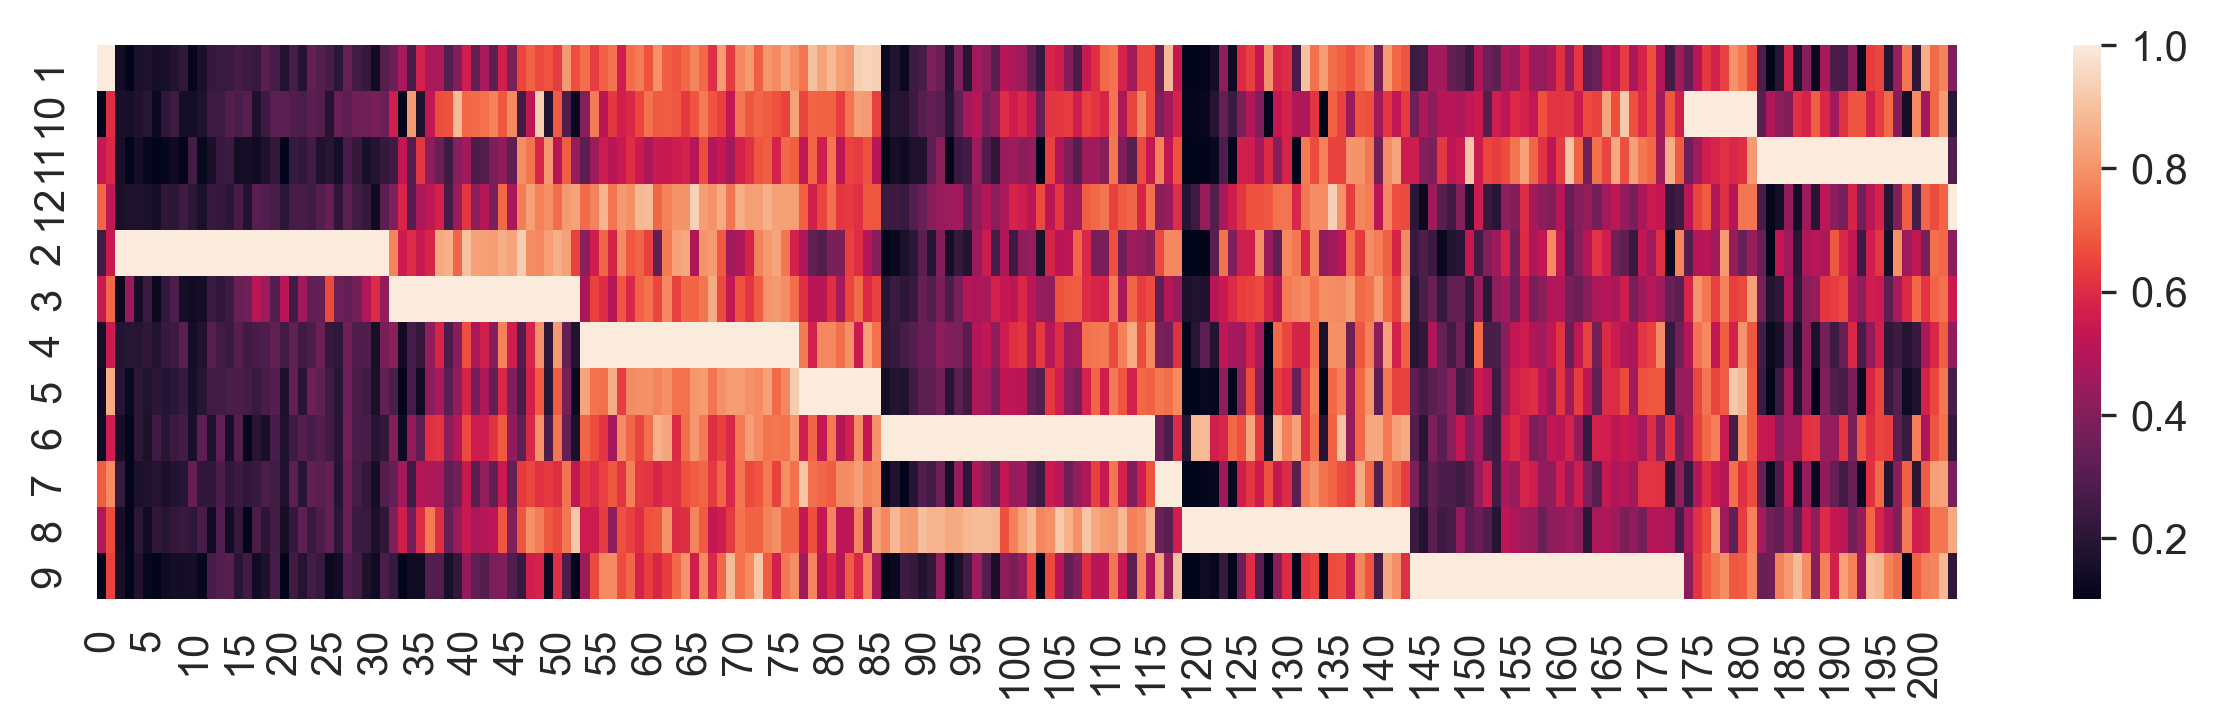

In [49]:
sc_ref_sp = spotiphy.construct_sc_ref(adata_f_sp, key_type=key_cluster)
spotiphy.sc_reference.plot_heatmap(adata_f_sp, key_cluster, save=True, out_dir=results_folder)

10it [00:00, 896.83it/s]


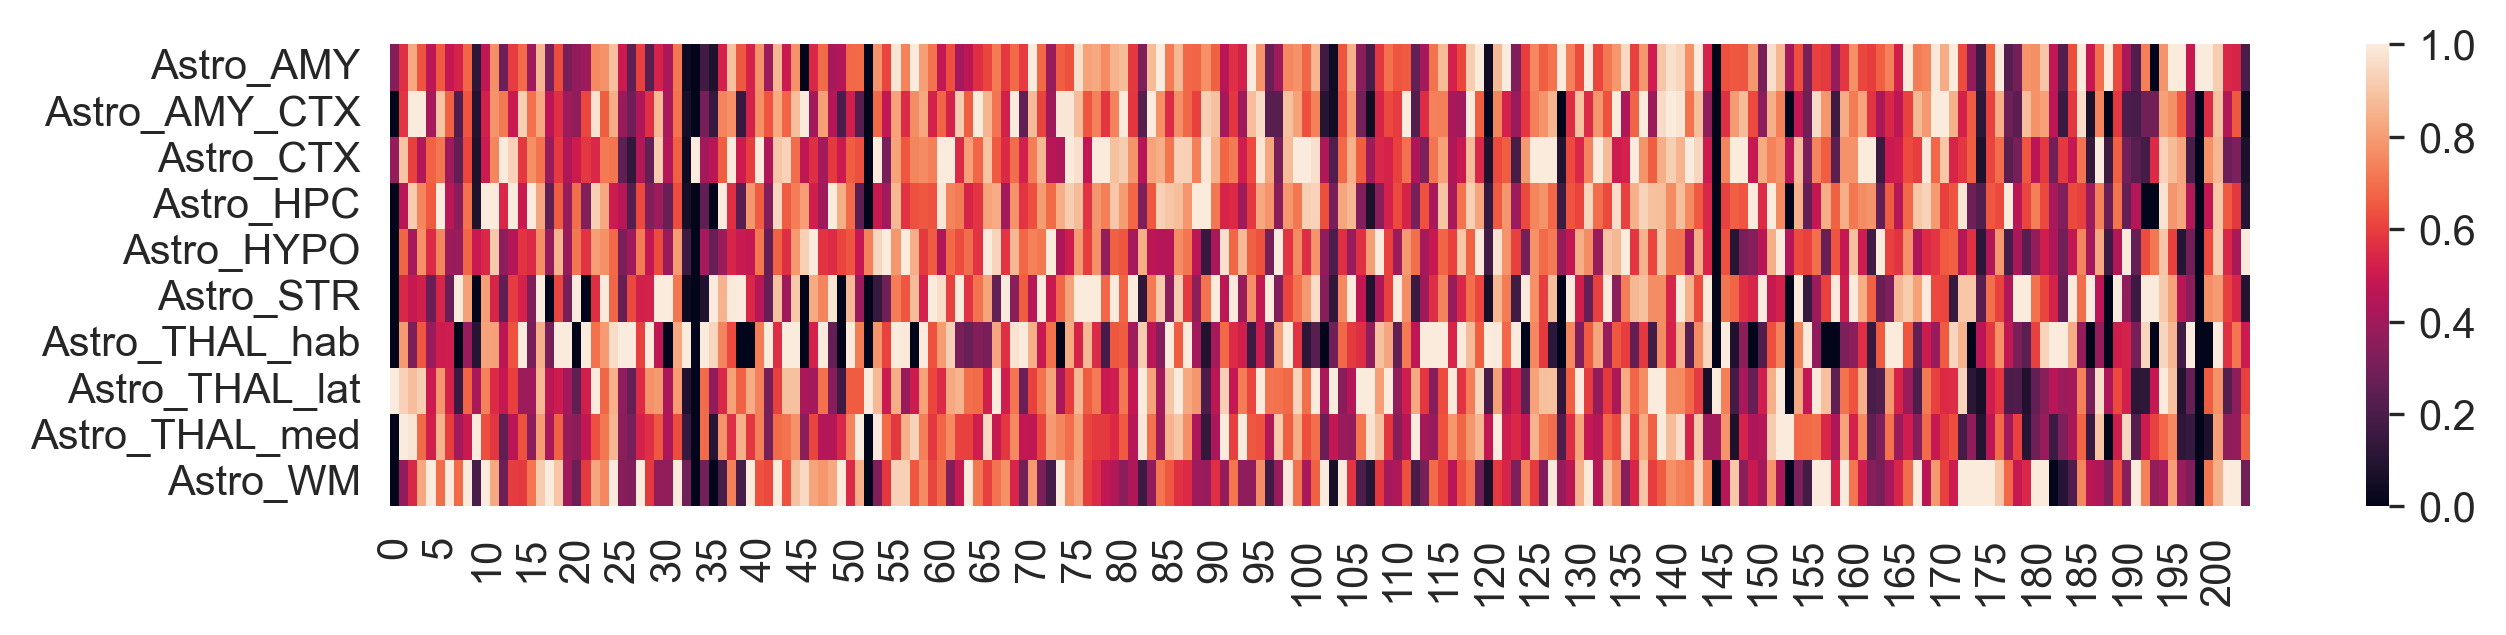

In [50]:
sc_ref_c2l = spotiphy.construct_sc_ref(adata_c2l[:, marker_gene_list_sp], key_type=key_cluster)
spotiphy.sc_reference.plot_heatmap(adata_c2l[:, marker_gene_list_sp], key_cluster, save=True, out_dir=results_folder)